In [1]:
import numpy as np
import pandas as pd
import os
import subprocess
import time
import matplotlib.pyplot as plt
import itertools
from copy import deepcopy
import sys

from rdkit import Chem
from rdkit.Chem import AllChem
import ase
from ase.io import read, write
from ase.units import Hartree
from ase.visualize import view

from ase.io.trajectory import Trajectory
import glob
import pickle

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [2]:
from photocatalysis.learners_treesearch import get_population_completed

In [3]:
### For automatically reloading import modules... allows you to run changes to code in jupyter without having to reload
%load_ext autoreload
%autoreload 2

In [4]:
local_path = os.path.join('/home/scakolli/Thesis/photocatalysis/workspace', 'DF_COMPLETE.json')
df = pd.read_json(local_path, orient='split')
# df = pd.read_json('/home/btpq/bt308495/Thesis/DF_COMPLETE.json', orient='split')

In [5]:
print("Fizzled / Total")
print("{} / {}".format(df.loc[df.calc_status == 'fizzled'].shape[0], df.shape[0]))

Fizzled / Total
1410 / 65552


In [6]:
# Get succesfully completed
df = get_population_completed(df)

------

# GPR MODEL

In [25]:
test_size = 0.3
random_state = 42

In [7]:
from photocatalysis.learners_treesearch import generate_ml_vectors, get_ML_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

In [16]:
### With np.arrays()
X = generate_ml_vectors(df).morgan_fp_bitvect.values

Y_IP = df.IP.values
Y_dGmax = df.dGmax.values

X_train_IP, X_test_IP, y_train_IP, y_test_IP = train_test_split(X, Y_IP, test_size=test_size, random_state=random_state)
X_train_dGmax, X_test_dGmax, y_train_dGmax, y_test_dGmax = train_test_split(X, Y_dGmax, test_size=test_size, random_state=random_state)

In [8]:
### With pd.DataFrames()
df_training, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

<Axes: ylabel='Frequency'>

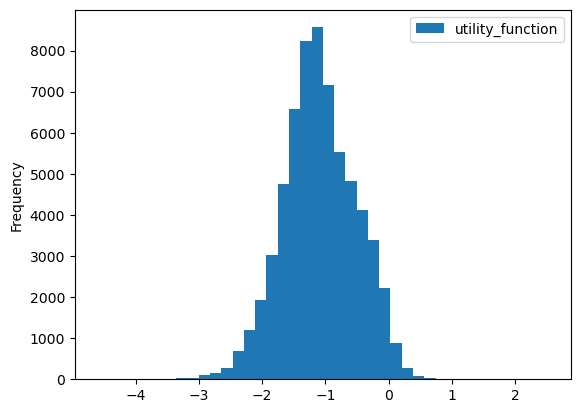

In [24]:
df.plot(y='utility_function', kind='hist', bins=40)

In [38]:
start = time.perf_counter()
gpr_ip, xtrain_ip, kip = get_ML_model(df_training, 'IP')
print('IP Fitting Took:', time.perf_counter() - start)


Fitting property: IP
Size of fitting set for ML model (_get_ML_model): 44899
Pbounds {'c': (0.1, 3.0), 'rbf': (1.0, 1.0), 'alpha': (0.001, 1.0)}

initial guess [1.0, 1.0, 0.1]


: 

: 

In [ ]:
start = time.perf_counter()
gpr_rdg, xtrain_rdg, krdg = get_ML_model(df_training, 'dGmax')
print('RDG Fitting Took:', time.perf_counter() - start)